In [21]:
# Goal: Create simple SED plots for a meeting
import sys, os
import warnings
warnings.filterwarnings("ignore", module="dynesty.sampling")
import numpy as np
import matplotlib.pyplot as plt
import astropy.constants as aconst
import astropy.units as u
from dynesty import plotting as dyplot
from dynesty import utils as dyfunc
import astropy.table as table
from astropy.cosmology import Planck15 as cosmology

try:
    import snelib19odp
except ImportError:
    sys.path.append('../lib')
import snelib19odp.dataloader as dataloader
import snelib19odp.const as const
import snelib19odp.analysis.oxygen as oxygen
import snelib19odp.blackbody as blackbody
import snelib19odp.specds as specds
import snelib19odp.dataset as dataset

In [2]:
def flux2luminosity(flux, distance):
    # all in cgs units
    return flux * 4 * np.pi * distance**2
dist_mpc = 64
dist_cm = dist_mpc * 1e6 * u.pc.to(u.cm)

In [22]:
sds = specds.load_dataset('SN2019odp')
ds = dataset.load_dataset('SN2019odp_phot')

In [4]:
sds.names

['ZTF19abqwtfu_20190821_P60_v1',
 'ZTF19abqwtfu_20190823_NTT_v1',
 'ZTF19abqwtfu_20190823_P60_v1',
 'ZTF19abqwtfu_20190824_P60_v1',
 'ZTF19abqwtfu_20190827_P200_v1',
 'ZTF19abqwtfu_20190827_P60_v1',
 'ZTF19abqwtfu_20190830_NOT_v1',
 'ZTF19abqwtfu_20190831_P60_v1',
 'ZTF19abqwtfu_20190910_P60_v1',
 'ZTF19abqwtfu_20190917_P60_v1',
 'ZTF19abqwtfu_20190922_P60_v1',
 'ZTF19abqwtfu_20190927_P60_v1',
 'ZTF19abqwtfu_20191003_NOT_v1',
 'ZTF19abqwtfu_20191006_P60_v1',
 'ZTF19abqwtfu_20191013_P60_v2',
 'ZTF19abqwtfu_20191019_P60_v1',
 'ZTF19abqwtfu_20191021_NOT_v1',
 'ZTF19abqwtfu_20191026_P60_v1',
 'ZTF19abqwtfu_20191103_P60_v1',
 'ZTF19abqwtfu_20191110_P60_v1',
 'ZTF19abqwtfu_20191122_NOT_v2',
 'ZTF19abqwtfu_20191123_P60_v1',
 'ZTF19abqwtfu_20191218_P60_v1',
 'ZTF19abqwtfu_20191221_P60_v1',
 'ZTF19abqwtfu_20200103_P60_v1',
 'ZTF19abqwtfu_20200113_NOT_v1',
 'ZTF19abqwtfu_20200124_Keck1_v1',
 'ZTF19abqwtfu_20200821_Keck1_v1']

In [11]:
def plot_spec_lum(spec, min_wave=0, rest=False):
    if rest:
        w_label = 'restwave'
    else:
        w_label = 'obswave'
    idx = spec[w_label] > min_wave
    lum = flux2luminosity(spec['flux'], dist_cm)
    
    plt.plot(spec[w_label][idx], lum[idx], label=spec.meta['name'])

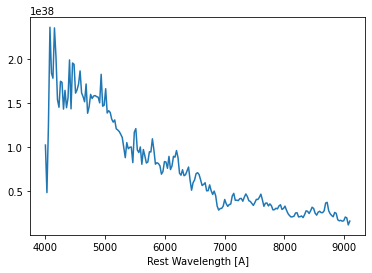

In [12]:
rest=True
plot_spec_lum(sds['ZTF19abqwtfu_20190821_P60_v1'], min_wave=4000, rest=rest)

if rest:
    plt.xlabel('Rest Wavelength [A]')
else:
    plt.xlabel('Obs. Wavelength [A]')

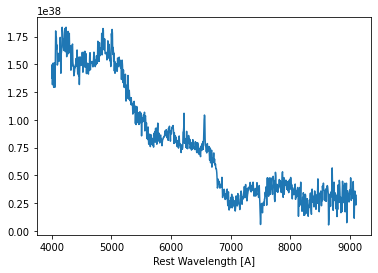

In [13]:
rest=True
plot_spec_lum(sds['ZTF19abqwtfu_20190823_NTT_v1'], min_wave=4000, rest=rest)

if rest:
    plt.xlabel('Rest Wavelength [A]')
else:
    plt.xlabel('Obs. Wavelength [A]')

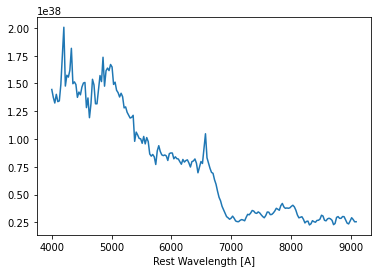

In [14]:
rest=True
plot_spec_lum(sds['ZTF19abqwtfu_20190823_P60_v1'], min_wave=4000, rest=rest)

if rest:
    plt.xlabel('Rest Wavelength [A]')
else:
    plt.xlabel('Obs. Wavelength [A]')

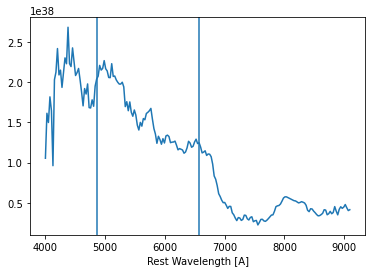

In [17]:
rest=True
plot_spec_lum(sds['ZTF19abqwtfu_20190824_P60_v1'], min_wave=4000, rest=rest)

if rest:
    plt.xlabel('Rest Wavelength [A]')
    plt.axvline(4861)
    plt.axvline(6562)
else:
    plt.xlabel('Obs. Wavelength [A]')

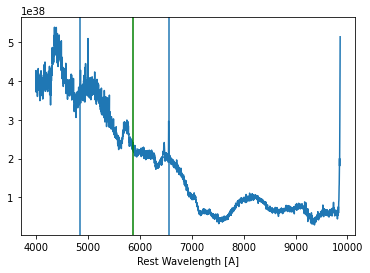

In [20]:
rest=True
plot_spec_lum(sds['ZTF19abqwtfu_20190827_P200_v1'], min_wave=4000, rest=rest)

if rest:
    plt.xlabel('Rest Wavelength [A]')
    plt.axvline(4861)
    plt.axvline(6562)
    plt.axvline(5876, color='green')
else:
    plt.xlabel('Obs. Wavelength [A]')